In [168]:
import csv
import requests
import pandas as pd
import io
import plotly.express as px


In [169]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-12-01/shelters.csv'

response=requests.get(url).content

tornado_df=pd.read_csv(io.StringIO(response.decode('utf-8')))

In [170]:
tornado_df.head()

,id,occupancy_date,organization_name,shelter_name,shelter_address,shelter_city,shelter_province,shelter_postal_code,facility_name,program_name,sector,occupancy,capacity
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0


In [171]:
tornado_df.describe()

,id,occupancy,capacity
count,115916.000000,115916.000000,115573.000000
mean,19325.915887,56.970211,60.528861
std,11164.582502,83.188821,92.601212
min,1.000000,0.000000,0.000000
25%,9660.000000,13.000000,16.000000
50%,19320.000000,37.000000,40.000000
75%,28979.250000,69.000000,71.000000
max,39446.000000,826.000000,902.000000


In [172]:
tornado_df.isnull().sum()
tornado_df = tornado_df[tornado_df['capacity'].notna()]
tornado_df.isnull().sum()

id                        0
occupancy_date            0
organization_name         0
shelter_name              0
shelter_address           0
shelter_city              0
shelter_province          0
shelter_postal_code    5494
facility_name             0
program_name              0
sector                    0
occupancy                 0
capacity                  0
dtype: int64

In [173]:

sector = tornado_df.groupby(by=["occupancy_date","sector"]).sum()


In [174]:
sector = sector.reset_index()
sector['percent_full'] = sector['occupancy']/sector['capacity'] 
sector.head()

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017-01-01T00:00:00,Co-ed,742,530,582.0,0.910653
1,2017-01-01T00:00:00,Families,501,1030,1150.0,0.895652
2,2017-01-01T00:00:00,Men,1635,1595,1706.0,0.934936
3,2017-01-01T00:00:00,Women,1318,641,697.0,0.919656
4,2017-01-01T00:00:00,Youth,1190,499,518.0,0.963320


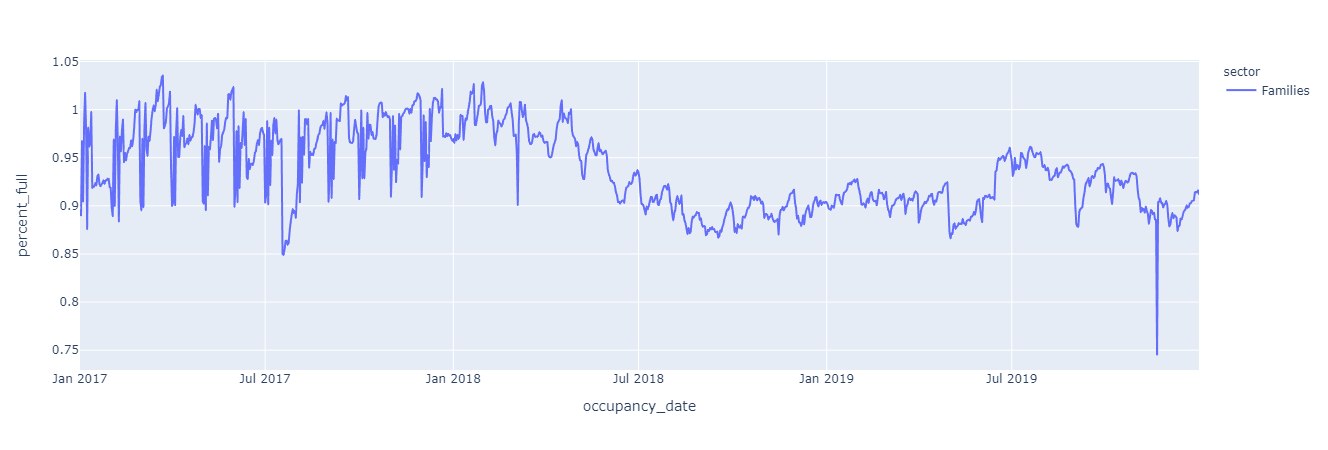

In [175]:
fig = px.line(sector[sector['sector']=='Families'], x="occupancy_date", y = "percent_full", color = "sector")
fig.show()

In [176]:
sector[sector['sector']!='Men']

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017-01-01T00:00:00,Co-ed,742,530,582.0,0.910653
1,2017-01-01T00:00:00,Families,501,1030,1150.0,0.895652
3,2017-01-01T00:00:00,Women,1318,641,697.0,0.919656
4,2017-01-01T00:00:00,Youth,1190,499,518.0,0.963320
5,2017-01-02T00:00:00,Co-ed,49522,458,582.0,0.786942
...,...,...,...,...,...,...
5469,2019-12-30T00:00:00,Youth,667965,532,543.0,0.979742
5470,2019-12-31T00:00:00,Co-ed,748381,795,815.0,0.975460
5471,2019-12-31T00:00:00,Families,590476,2675,2932.0,0.912347
5473,2019-12-31T00:00:00,Women,1063721,958,979.0,0.978550


In [177]:
sector.dtypes

occupancy_date     object
sector             object
id                  int64
occupancy           int64
capacity          float64
percent_full      float64
dtype: object

In [178]:
sector['occupancy_date'] = pd.to_datetime(sector['occupancy_date'], format="%Y-%m-%dT%H:%M:%S")
sector.head()

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017-01-01,Co-ed,742,530,582.0,0.910653
1,2017-01-01,Families,501,1030,1150.0,0.895652
2,2017-01-01,Men,1635,1595,1706.0,0.934936
3,2017-01-01,Women,1318,641,697.0,0.919656
4,2017-01-01,Youth,1190,499,518.0,0.963320


In [179]:
sector.dtypes

occupancy_date    datetime64[ns]
sector                    object
id                         int64
occupancy                  int64
capacity                 float64
percent_full             float64
dtype: object

In [180]:
sector['occupancy_date'] = sector['occupancy_date'].dt.strftime('%Y - %m ')
sector.head()

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017 - 01,Co-ed,742,530,582.0,0.910653
1,2017 - 01,Families,501,1030,1150.0,0.895652
2,2017 - 01,Men,1635,1595,1706.0,0.934936
3,2017 - 01,Women,1318,641,697.0,0.919656
4,2017 - 01,Youth,1190,499,518.0,0.963320


In [181]:
sector = sector.groupby(by=["occupancy_date","sector"]).mean()
sector = sector.reset_index()
sector.head()

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017 - 01,Co-ed,129492.709677,501.225806,590.387097,0.849438
1,2017 - 01,Families,129889.903226,1221.419355,1302.548387,0.934599
2,2017 - 01,Men,291737.096774,1657.225806,1753.516129,0.945121
3,2017 - 01,Women,175032.645161,669.161290,698.967742,0.957274
4,2017 - 01,Youth,137680.032258,499.064516,518.000000,0.963445


In [182]:
sector['percent_full'] = sector['occupancy']/sector['capacity'] 
sector.head()

,occupancy_date,sector,id,occupancy,capacity,percent_full
0,2017 - 01,Co-ed,129492.709677,501.225806,590.387097,0.848978
1,2017 - 01,Families,129889.903226,1221.419355,1302.548387,0.937715
2,2017 - 01,Men,291737.096774,1657.225806,1753.516129,0.945087
3,2017 - 01,Women,175032.645161,669.161290,698.967742,0.957356
4,2017 - 01,Youth,137680.032258,499.064516,518.000000,0.963445


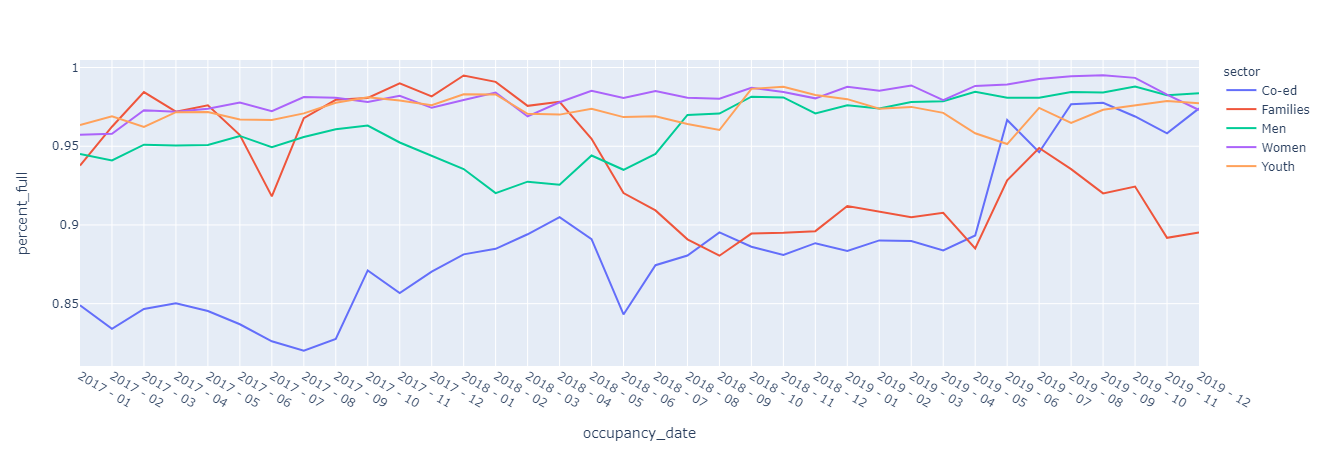

In [183]:
fig = px.line(sector, x="occupancy_date", y = "percent_full", color = "sector")
fig.show()

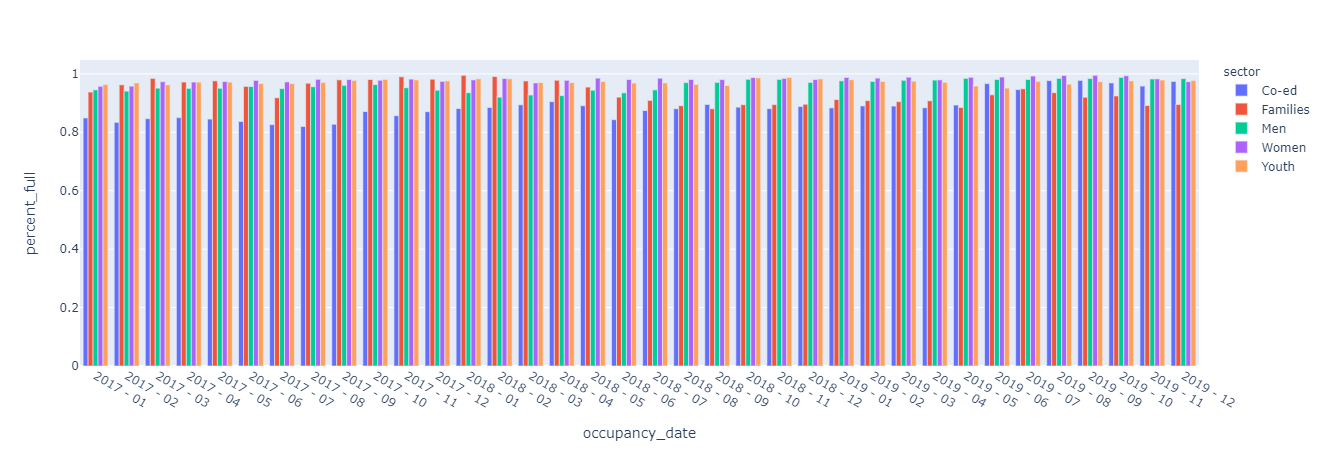

In [184]:
fig = px.bar(sector, x="occupancy_date", y = "percent_full", color = "sector", barmode='group')
fig.show()

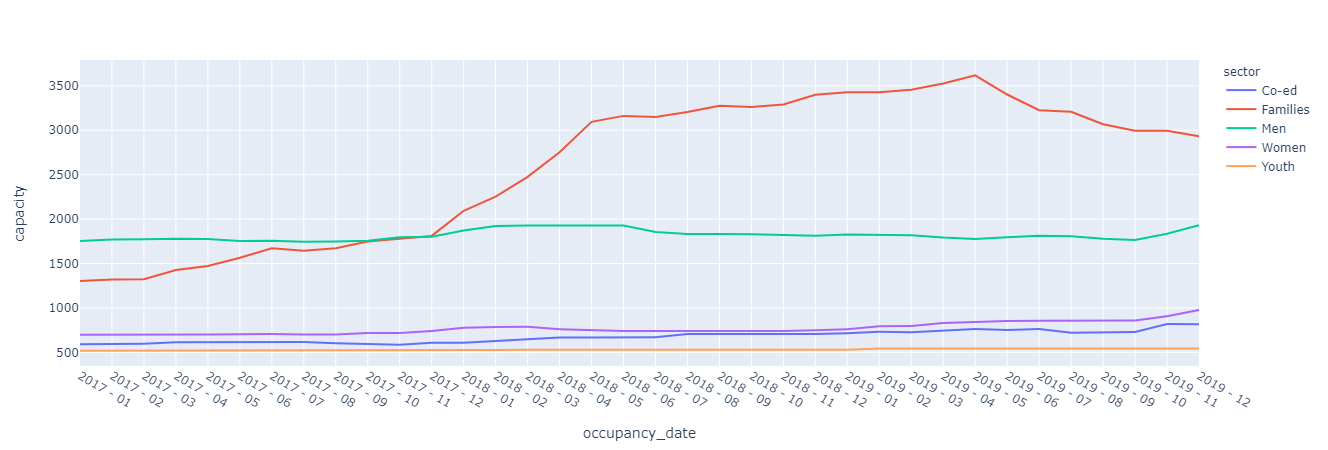

In [185]:
fig = px.line(sector, x="occupancy_date", y = "capacity", color = "sector")
fig.show()

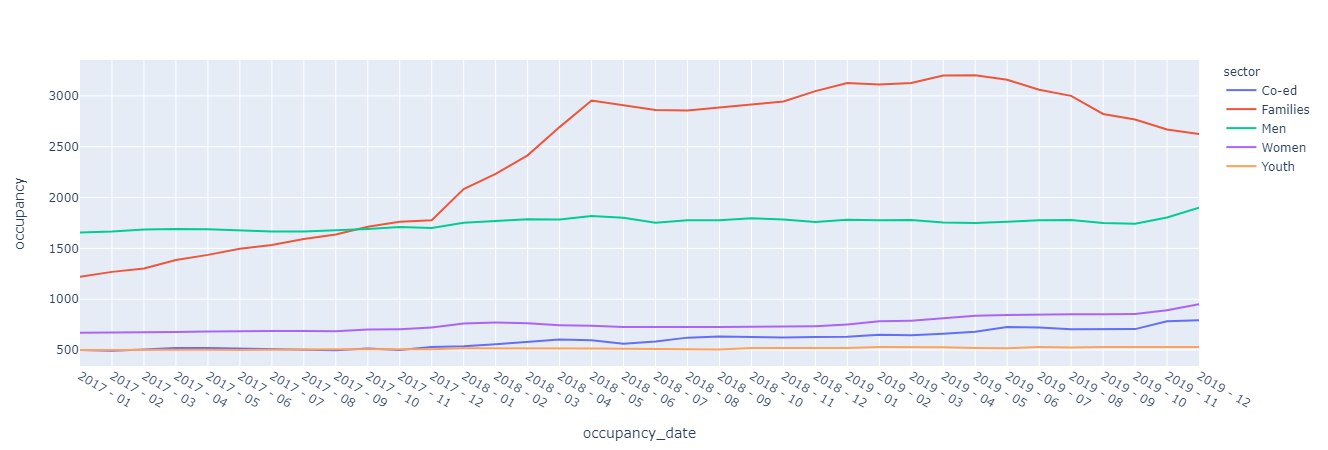

In [186]:
fig = px.line(sector, x="occupancy_date", y = "occupancy", color = "sector")
fig.show()

In [212]:
org_name = tornado_df.groupby(by=["occupancy_date","organization_name"]).sum()
org_name = org_name.reset_index()
org_name['percent_full'] = org_name['occupancy']/org_name['capacity'] 
org_name.head()

,occupancy_date,organization_name,id,occupancy,capacity,percent_full
0,2017-01-01T00:00:00,COSTI Immigrant Services,1,16,16.0,1.000000
1,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,5,76,80.0,0.950000
2,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",4,66,70.0,0.942857
3,2017-01-01T00:00:00,City of Toronto,507,1669,1830.0,0.912022
4,2017-01-01T00:00:00,Cornerstone Place,33,50,50.0,1.000000


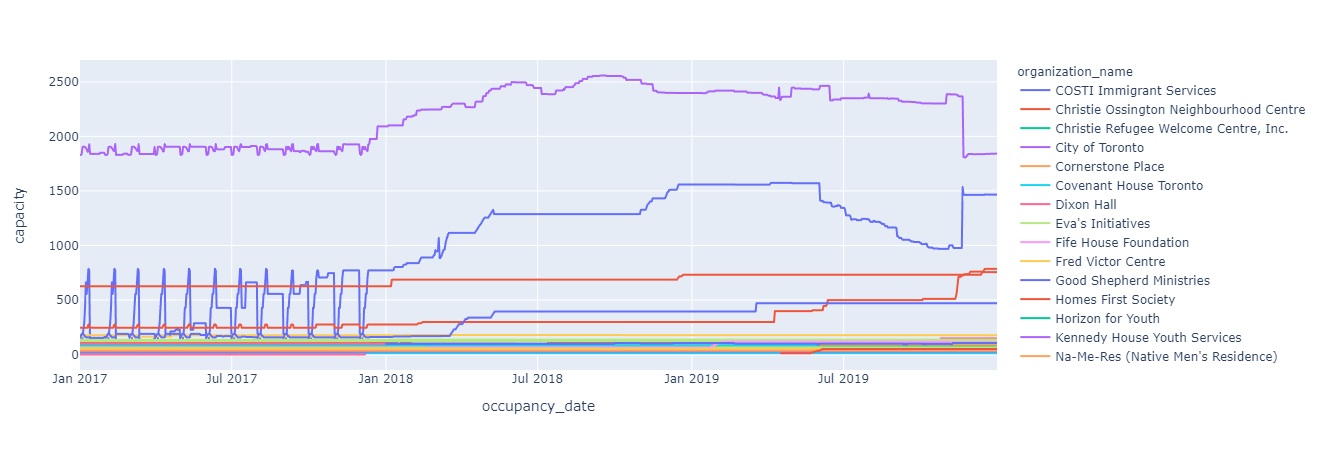

In [205]:
fig = px.line(org_name, x="occupancy_date", y = "capacity", color = "organization_name")
fig.show()

In [213]:
org_name['occupancy_date'] = pd.to_datetime(org_name['occupancy_date'], format="%Y-%m-%dT%H:%M:%S")
org_name['occupancy_date'] = org_name['occupancy_date'].dt.strftime('%Y - %m ')
org_name = org_name.groupby(by=["occupancy_date","organization_name"]).mean()
org_name['percent_full'] = org_name['occupancy']/org_name['capacity'] 
org_name= org_name.reset_index()
org_name.head()

,occupancy_date,organization_name,id,occupancy,capacity,percent_full
0,2017 - 01,COSTI Immigrant Services,27195.548387,132.032258,158.032258,0.835477
1,2017 - 01,Christie Ossington Neighbourhood Centre,24669.903226,100.612903,109.032258,0.922781
2,2017 - 01,"Christie Refugee Welcome Centre, Inc.",9368.935484,68.129032,75.806452,0.898723
3,2017 - 01,City of Toronto,227983.580645,1748.258065,1856.451613,0.941720
4,2017 - 01,Cornerstone Place,8076.290323,49.903226,50.000000,0.998065


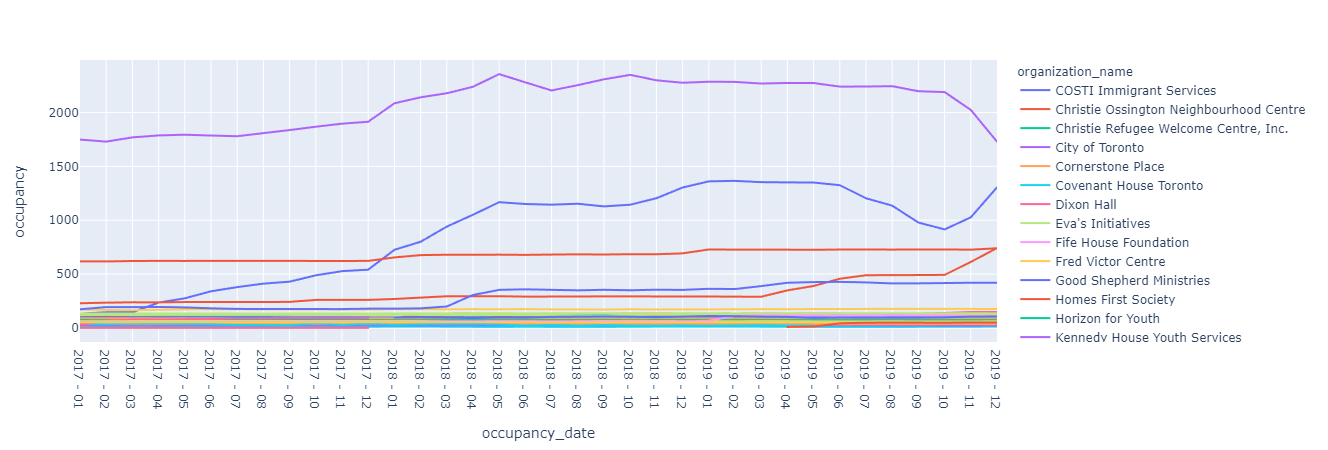

In [218]:
fig = px.line(org_name, x="occupancy_date", y = "occupancy", color = "organization_name")
fig.show()